# Инициализация

Загружаем библиотеки необходимые для выполнения кода ноутбука.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'

# === ЭТАП 1 ===

# Загрузка первичных данных

Загружаем первичные данные из файлов:
- tracks.parquet
- catalog_names.parquet
- interactions.parquet

In [9]:
cnames = pd.read_parquet("./data/catalog_names.parquet")

In [ ]:
tracks = pd.read_parquet("./data/tracks.parquet")
interactions = pd.read_parquet('./data/interactions.parquet')

# Обзор данных

Проверяем данные, есть ли с ними явные проблемы.

In [69]:
cnames.sample(5)

,id,type,name
83170,757168,album,Elvis '57 - 4 Track EP
155409,2495822,album,Venus on Earth
649912,20342081,album,Ultimate Covers
1152084,22008902,track,Namah Shivaya
802418,10134637,artist,Наталья Коржова


In [57]:
cnames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1812471 entries, 0 to 1812470
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   id      int64 
 1   type    object
 2   name    object
dtypes: int64(1), object(2)
memory usage: 41.5+ MB


In [58]:
# пропуски значений
print(cnames.isnull().sum().sort_values(ascending=False))

id      0
type    0
name    0
dtype: int64


In [73]:
tracks.sample(5)

,track_id,albums,artists,genres
24922,157289,[15147],[61365],[25]
558258,38367711,"[3738452, 7388872]",[292769],"[43, 47]"
172417,4500266,"[509203, 509204, 509205, 5901759, 13591401]","[16406, 5171062]",[70]
416203,28588972,[3419953],"[525095, 1971326, 4335266]",[16]
698234,51437177,[4410563],[4391642],"[3, 75]"


In [74]:
tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype 
---  ------    --------------    ----- 
 0   track_id  1000000 non-null  int64 
 1   albums    1000000 non-null  object
 2   artists   1000000 non-null  object
 3   genres    1000000 non-null  object
dtypes: int64(1), object(3)
memory usage: 30.5+ MB


In [11]:
print(tracks.isnull().sum().sort_values(ascending=False))

track_id    0
albums      0
artists     0
genres      0
dtype: int64


In [75]:
interactions.sample(5)

,user_id,track_id,track_seq,started_at
177,1074358,18866881,178,2022-11-26
560,719207,27646734,561,2022-11-24
954,1043472,79339311,955,2022-12-25
452,147123,42832402,453,2022-04-03
166,1085155,66613174,167,2022-11-07


In [76]:
interactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 222629898 entries, 0 to 291
Data columns (total 4 columns):
 #   Column      Dtype         
---  ------      -----         
 0   user_id     int32         
 1   track_id    int32         
 2   track_seq   int16         
 3   started_at  datetime64[ns]
dtypes: datetime64[ns](1), int16(1), int32(2)
memory usage: 5.4 GB


In [14]:
print(interactions.isnull().sum().sort_values(ascending=False))

user_id       0
track_id      0
track_seq     0
started_at    0
dtype: int64


Сколько треков с пустым значением жанр:

In [15]:
len(tracks[tracks['genres'].str.len() == 0])

3687

больше 3х тысяч. Посмотрим сколько вообще есть жанров и куда отнести пропуски

In [10]:
genres = cnames[cnames['type'] == 'genre'].reset_index()
genres

,index,id,type,name
0,812305,0,genre,all
1,812306,1,genre,eastern
2,812307,2,genre,rusrock
3,812308,3,genre,rusrap
4,812309,4,genre,postrock
...,...,...,...,...
161,812466,1182,genre,balkan
162,812467,1197,genre,experimental
163,812468,1370,genre,europop
164,812469,1484,genre,meditation


есть жанр "all" c id=0 отнесём к нему нераспределённые треки

In [39]:
no_ganre_ids = tracks[tracks['genres'].str.len() == 0].index
tracks['genres'].iloc[no_ganre_ids] = [[0]]

/tmp/ipykernel_2389/4289129310.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tracks['genres'].iloc[no_ganre_ids] = [[0]]


In [93]:
noartists = tracks[tracks['artists'].str.len() == 0]
len(noartists)

15369

Треков без указания исполнителей больше 15 тыс.

In [51]:
artists = cnames[cnames['type'] == 'artist']
artists.nunique()

id      153581
type         1
name    151196
dtype: int64

Названия артистов имеют ~1.5% неуникальных значений. К примеру содержащие подстроку Noname:

In [48]:
artists[artists['name'].str.contains('Noname')]

,id,type,name
687943,433042,artist,Nonamerz
688167,438286,artist,Noname
745302,3991857,artist,Noname MC
776037,6310571,artist,Noname


Треков без указания альбома всего 18:

In [62]:
noalbum = tracks[tracks['albums'].str.len() == 0].merge(cnames[['id','name']],left_on='track_id', right_on='id')
noalbum

,track_id,albums,artists,genres,id,name
0,20200372,[],[],[0],20200372,На скотч
1,20200380,[],[],[0],20200380,Yo Te Quiero (Я тебя люблю)
2,20305116,[],[],[0],20305116,Мой путь
3,20305121,[],[],[0],20305121,Вечность
4,20756854,[],[],[0],20756854,Виновата
5,21196099,[],[],[0],21196099,Are You with Me
6,21196103,[],[],[0],21196103,Historia de Amor
7,21196105,[],[],[0],21196105,Stronger Than Ever
8,21196107,[],[],[0],21196107,Here We Go
9,21196109,[],[],[0],21196109,Long Story Short


In [94]:
#посмотрим на треки "без исполнителей"
noartists.merge(cnames[['id','name']],left_on='track_id', right_on='id')

,track_id,albums,artists,genres,id,name
0,3599314,[389925],[],"[68, 86]",3599314,Sparkles(Magikal Remake)
1,3599591,[389944],[],"[68, 86]",3599591,Cry For Love
2,4790215,[533785],[],"[68, 86]",4790215,Try To Be Love
3,10063296,[1083742],[],"[11, 20]",10063296,Теплое Солнце
4,12122918,[1315834],[],[68],12122918,17 & 4
...,...,...,...,...,...,...
15364,101201589,[12649219],[],"[62, 77]",101201589,Троя | История на ночь #40
15365,101219571,[9444321],[],"[62, 83, 77]",101219571,Главное — не победа!
15366,101243616,[11700332],[],"[62, 93]",101243616,Кинокраши. В каких актеров и актрис мы были вл...
15367,101292599,[9331881],[],"[62, 90, 77, 84]",101292599,"«Все у женщины в психике настроено для любви, ..."


Выясним как часто пользователи взаимодействуют с треками для которых не указан исполнитель:

In [88]:
noartist_track_interactions = interactions[interactions['track_id'].isin(noartists['track_id'])]

In [90]:
noartist_track_interactions.groupby('track_id').agg(popularity=('user_id','count'),position=('track_seq','mean')).reset_index().sort_values(by='popularity',ascending=False)

,track_id,popularity,position
9638,69649273,552,449.646739
5224,59020206,528,314.464015
9768,69988431,491,472.775967
12611,78795354,485,484.748454
4199,55952230,420,515.435714
...,...,...,...
15359,100850172,5,962.600000
15361,100929797,5,1044.200000
15362,100949775,5,139.400000
15363,101086739,5,814.600000


In [92]:
interactions[['track_seq']].describe()

count    2.226299e+08
mean     4.621403e+02
std      8.257312e+02
min      1.000000e+00
25%      5.600000e+01
50%      1.810000e+02
75%      5.060000e+02
max      1.663700e+04
Name: track_seq, dtype: float64

Относительно средних значений позиций трека в плейлисте, треки без указания исполнителей достаточно популярны. Привязывать их к существующим записям Noname не логично. На работе алгоритмов колоборативной фильтрации отсутствие этой информации никак не скажется.

# Выводы

Приведём выводы по первому знакомству с данными:
- есть ли с данными явные проблемы,
- какие корректирующие действия (в целом) были предприняты.

- Данные имеют типы соответстующие хранимым данным. 
- Индексы для связей таблиц имеют числовые типы, перекодировка не требуется.
- нет информации о том понравился ли трек пользователю. Отметка `количество прослушиваний`, `прослушал до конца`, `добавил в избранное` или `прослушал менее половины трека` - эту информацию можно было бы учитывать при формировании рекомендаций, но её к сожалению нет.
- данные о позиции трека в истории прослушивания сложно интерпритировать как рейтинг, т.к. если пользователь активно слушает музыку в сервисе, то популярные треки так или иначе сползают в истории из-за общего количества прослушанных треков.

# === ЭТАП 2 ===

# EDA

Распределение количества прослушанных треков.

In [5]:
interactions["started_at_month"] = pd.to_datetime(interactions["started_at"]).dt.to_period('M').dt.to_timestamp().dt.date
interactions_by_month = interactions.groupby("started_at_month").agg(events=("started_at", "count"), users=("user_id", "nunique")).reset_index()
interactions_by_month

,started_at_month,events,users
0,2022-01-01,2409541,126224
1,2022-02-01,4533363,227852
2,2022-03-01,7691225,344333
3,2022-04-01,10230295,454378
4,2022-05-01,13613489,569813
5,2022-06-01,16266558,676467
6,2022-07-01,20188819,788369
7,2022-08-01,23919641,892539
8,2022-09-01,26953965,979781
9,2022-10-01,31810464,1056636


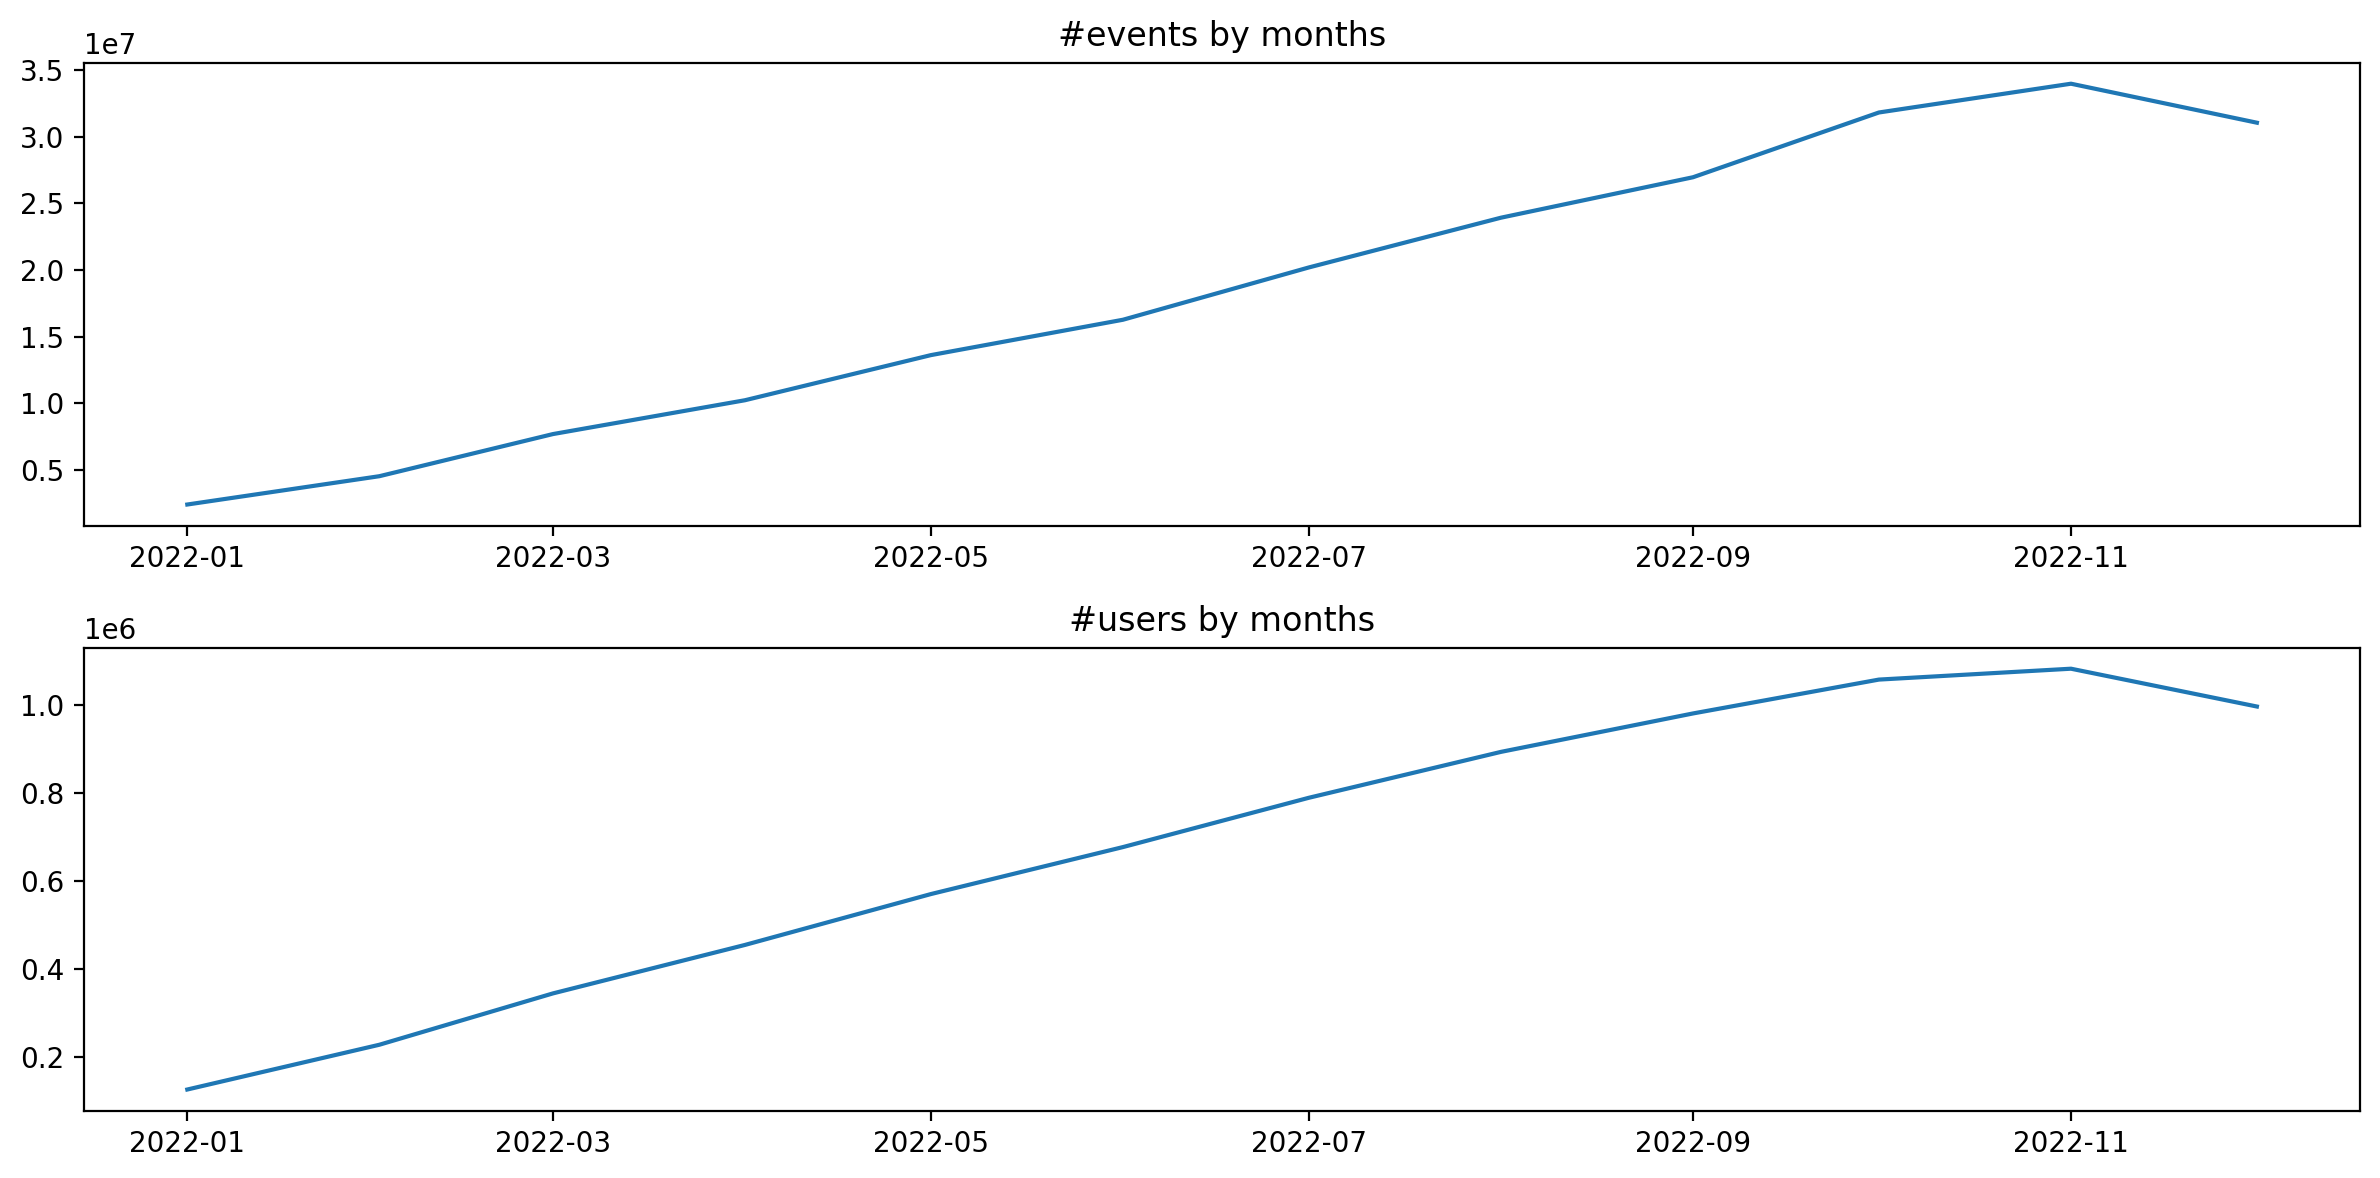

In [6]:
# распределение взаимодействий по месяцам

fig, axs = plt.subplots(2, 1, figsize=(12, 6))

ax = axs[0]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["events"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#events by months")

ax = axs[1]
ax.plot(interactions_by_month["started_at_month"], interactions_by_month["users"])
# ax.tick_params(axis='x', labelsize=8)
ax.set_title("#users by months")

fig.tight_layout()

Наиболее популярные треки

In [4]:
top_tracks = interactions.groupby('track_id').agg(popularity=('user_id','count'),position=('track_seq','mean')).reset_index().sort_values(by='popularity',ascending=False)
top_tracks.head(10)

,track_id,popularity,position
9098,53404,111062,17.265590
483876,33311009,106921,218.685254
26665,178529,101924,37.842608
512157,35505245,99490,152.547653
829320,65851540,86670,280.660102
368072,24692821,86246,182.571145
475289,32947997,85886,199.641210
696106,51241318,85244,301.481676
90461,795836,85042,91.821265
647237,45499814,84748,221.481262


В первой десятке популярных треков средняя позиция в истории от 17ой до 301ой , сфоримировать веса популярности сложно, вернёмся к этой задаче, если популярность трека основанная только на количестве прослушиваний покажет себя несостоятельной.

In [5]:
track_names = cnames[cnames['type'] == 'track']

In [6]:
pop_info = top_tracks.merge(track_names,left_on='track_id',right_on='id').merge(tracks[['track_id','artists','genres','albums']],on='track_id')
pop_info

,track_id,popularity,position,id,type,name,artists,genres,albums
0,53404,111062,17.265590,53404,track,Smells Like Teen Spirit,[9262],"[13, 14, 102]","[4367, 89708, 294911, 294912, 294914, 297393, ..."
1,33311009,106921,218.685254,33311009,track,Believer,[675068],"[14, 102]","[4440454, 4456609, 4482682, 4882996, 5072976, ..."
2,178529,101924,37.842608,178529,track,Numb,[36800],"[41, 47]","[18113, 21924, 21940, 488052, 10009799]"
3,35505245,99490,152.547653,35505245,track,I Got Love,"[4611844, 588511]","[3, 75]","[4431303, 20559909]"
4,65851540,86670,280.660102,65851540,track,Юность,[1554548],"[11, 20]",[10692414]
...,...,...,...,...,...,...,...,...,...
999995,84391078,5,935.000000,84391078,track,Intro к Mamma Maria,[],[62],[15988902]
999996,84391079,5,1317.600000,84391079,track,Intro к Koldunya,[],[62],[15988902]
999997,84391080,5,800.800000,84391080,track,Intro к Barbie Girl,[],[62],[15988902]
999998,34766819,5,272.400000,34766819,track,Reign Fall,[3860340],[13],[4297686]


Наиболее популярные жанры

In [80]:
def get_genres(items):

    """ 
    извлекает список жанров по всем трекам, 
    подсчитывает кличество прослушиваний каждого трека
    """
    
    genres_counter = {}
    
    for _, v in items.iterrows():
        genre_raw = v["genres"]
        for genre_id in genre_raw:
            # увеличиваем счётчик жанров
            try:
                genres_counter[genre_id] += v["popularity"]
            except KeyError:
                genres_counter[genre_id] = v["popularity"]

    genres = pd.DataFrame.from_dict(genres_counter, orient='index',columns=['popularity'])
    genres.index.name = 'id'
    
    return genres
   
genres = get_genres(pop_info)

In [81]:
# список жанров
genres_all = cnames[cnames['type'] == 'genre']

In [82]:
genres = genres.merge(genres_all, on='id').sort_values(by='popularity',ascending=False).reset_index()
genres

,index,id,popularity,type,name
0,7,11,55578312,genre,pop
1,6,75,37799821,genre,rap
2,2,102,31092013,genre,allrock
3,8,20,26626241,genre,ruspop
4,5,3,25303695,genre,rusrap
...,...,...,...,...,...
138,137,91,497,genre,recreation
139,142,82,468,genre,government
140,141,113,388,genre,israelirock
141,139,115,247,genre,turkishclassical


In [83]:
# Сохраним топ жанров чтобы заново не считать
genres[['id','popularity','name']].to_parquet("./data/top_genre.parquet")

Треки, которые никто не прослушал

In [8]:
#прослушанные треки
activ_track_id = interactions["track_id"].unique()

nolistening_tracks = tracks[~tracks['track_id'].isin(activ_track_id)]
nolistening_tracks

,track_id,albums,artists,genres


# Преобразование данных

Преобразуем данные в формат, более пригодный для дальнейшего использования в расчётах рекомендаций.

In [7]:
items = pop_info[['track_id','popularity','position','name','artists','genres','albums']].copy()
events = interactions.copy()

# переименовка столбцов в кастомные

items.rename(columns = {'track_id': 'item_id'}, inplace = True)
events.rename(columns = {'track_id': 'item_id'}, inplace = True)

del tracks
del interactions

# Сохранение данных

Сохраним данные в двух файлах в персональном S3-бакете по пути `recsys/data/`:
- `items.parquet` — все данные о музыкальных треках,
- `events.parquet` — все данные о взаимодействиях.

In [8]:
# сохраняем локально
items.to_parquet("./data/items.parquet")
events.to_parquet("./data/events.parquet")

In [ ]:
%pip install python-dotenv, boto3

In [9]:
# сохранение на S3-бакете

import os
from dotenv import load_dotenv
import boto3

load_dotenv(dotenv_path='./../mle-project-sprint-2-v001/.env')

True

In [10]:
S3_BUCKET_NAME = os.environ.get("S3_BUCKET_NAME")
try:
    session = boto3.session.Session()
    s3 = session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.environ.get("AWS_SECRET_ACCESS_KEY")
    )
    # Filename - File to upload
    # Bucket - Bucket to upload to (the top level directory under AWS S3)
    # Key - S3 object name (can contain subdirectories). If not specified then file_name is used
    s3.upload_file(Filename='./data/items.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/data/items.parquet')
    s3.upload_file(Filename='./data/events.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/data/events.parquet')
except Exception as e:
    print(e)

In [11]:
# смотрим что там сохранилось в бакет

try:
    for key in s3.list_objects(Bucket=S3_BUCKET_NAME)['Contents']:
        
        if key['Key'] in ['recsys/data/items.parquet','recsys/data/events.parquet']:
            
            lines = [f'{k}: {v}' for k, v in key.items()]
            print('\n'.join(lines),'\n')

except Exception as e:
    print(e)

Key: recsys/data/events.parquet
LastModified: 2024-10-29 07:57:44.285000+00:00
ETag: "620493c3e2e7710d6638aee471cd0c05-145"
Size: 1208078030
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 

Key: recsys/data/items.parquet
LastModified: 2024-10-29 07:57:25.336000+00:00
ETag: "ee5af9d160ed6cd1adfad4ce8b9102c9-6"
Size: 46926580
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 



# Очистка памяти

Здесь, может понадобится очистка памяти для высвобождения ресурсов для выполнения кода ниже. 

Приведите соответствующие код, комментарии, например:
- код для удаление более ненужных переменных,
- комментарий, что следует перезапустить kernel, выполнить такие-то начальные секции и продолжить с этапа 3.

In [86]:
del items
del events

# === ЭТАП 3 ===

# Загрузка данных

Если необходимо, то загружаем items.parquet, events.parquet.

In [ ]:
"""
Если надо забрать файл с бакета S3, то подключение как выше.
Скачивание файла функцией:
s3.download_file(Bucket, Key, Filename)
"""

In [3]:
# загружаем локальные файлы
items = pd.read_parquet("./data/items.parquet")
events = pd.read_parquet('./data/events.parquet')

# Разбиение данных

Разбиваем данные на тренировочную, тестовую выборки.

In [4]:
# зададим точку разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")
train_test_global_time_split_idx  = events["started_at"] < train_test_global_time_split_date

events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [ ]:
# количество пользователей в train и test
users_train = events_train["user_id"].drop_duplicates()
users_test = events_test["user_id"].drop_duplicates()

# количество пользователей, которые есть и в train, и в test
common_users = list(set(users_train) & set(users_test))
# холодные
cold_users = list(set(users_test) - set(common_users))

print(f"""Пользователей: \n
      в тренировочной выборке {len(users_train)} \n
      в тестовой {len(users_test)} \n 
      в обеих выборках {len(common_users)} \n
      только в тестовой (холодные) {len(cold_users)}""")

Пользователей: 

      в тренировочной выборке 1342566 

      в тестовой 783525 
 
      в обеих выборках 752870 

      только в тестовой (холодные) 30655


# Топ популярных

Рассчитаем рекомендации как топ популярных.

In [4]:
#для исключения утечки данных о популярности треков из events_test удалим сведения о популярности и средней позиции трека в истории из таблицы items
items.drop(['popularity','position'],axis=1,inplace=True)

In [6]:
# Считаем популярность с среднюю позицию  трека в истории пользователей
item_popularity = events_train.groupby(["item_id"]).agg(users=("user_id", "nunique"), avg_seq=("track_seq", "mean")).reset_index()

In [10]:
def pop_k_metrics(df,pop_fild,k):
    """
    Считаем среднюю массовость и зарытость в историю первых k треков выбранной стратегии сортировки
    df - items
    pop_fild  - стратегия сортировки
    k - top k
    """
    
    cur = df.sort_values(by=[pop_fild],ascending=False)[0:k]
    return round(cur['users'].mean()),round(cur['avg_seq'].mean())

In [8]:
# Простая идея - популярно то что многие слушают
item_popularity.sort_values(by=["users"],ascending=False).merge(items[['item_id','name']],on='item_id')[0:20]

,item_id,users,avg_seq,name
0,53404,110026,17.389681,Smells Like Teen Spirit
1,33311009,101076,225.144396,Believer
2,178529,100866,38.155781,Numb
3,35505245,95523,155.747914,I Got Love
4,24692821,84153,185.660666,Way Down We Go
5,795836,83749,92.921229,Shape Of My Heart
6,6705392,80608,161.816842,Seven Nation Army
7,32947997,80243,207.274068,Shape of You
8,37384,79512,14.373403,Zombie
9,45499814,78564,229.204114,Life


In [11]:
print(pop_k_metrics(item_popularity,"users",100))

(61163, 205)


Подход Кажестя неплохим, но трек мог быть вирусным и уйти в историю, эти "заезженные пластинки" могут даже раздражать.

Попробуем найти то что слушают многие и чаще это в топах треклиста

In [13]:
item_popularity["popularity_linear"] = item_popularity["users"] / item_popularity["avg_seq"]
item_popularity.sort_values(by=["popularity_linear"],ascending=False).merge(items[['item_id','name']],on='item_id')[0:20]

,item_id,users,avg_seq,popularity_linear,name
0,1721,27536,1.944182,14163.281890,Stop
1,1062,19171,1.379062,13901.476700,La Camisa Negra
2,986,19272,1.684516,11440.672252,Fortunate Son
3,7786,43652,3.923302,11126.340675,My Favourite Game
4,10216,51214,4.736381,10812.897757,Wind Of Change
5,8264,42418,3.971946,10679.400316,Paper Planes
6,3264,21962,2.531555,8675.302061,Stronger
7,4116,25037,3.098974,8079.126796,Heads Will Roll
8,9769,37909,5.986547,6332.365169,I Was Made For Lovin' You
9,53404,110026,17.389681,6327.085724,Smells Like Teen Spirit


In [14]:
print(pop_k_metrics(item_popularity,"popularity_linear",100))

(24901, 11)


Эта выдача больше похожа на "топ новинок" или "слушают сейчас" - даже не сильно популярные треки получают большие веса, если их недавно слушали

попробуем дать больше веса мнению большинства

In [15]:
item_popularity["popularity_quadro"] = item_popularity["users"]**2 / item_popularity["avg_seq"]
item_popularity.sort_values(by=["popularity_quadro"],ascending=False).merge(items[['item_id','name']],on='item_id')[0:20]

,item_id,users,avg_seq,popularity_linear,popularity_quadro,name
0,53404,110026,17.389681,6327.085724,6.961439e+08,Smells Like Teen Spirit
1,10216,51214,4.736381,10812.897757,5.537717e+08,Wind Of Change
2,7786,43652,3.923302,11126.340675,4.856870e+08,My Favourite Game
3,8264,42418,3.971946,10679.400316,4.529988e+08,Paper Planes
4,37384,79512,14.373403,5531.884227,4.398512e+08,Zombie
5,1721,27536,1.944182,14163.281890,3.900001e+08,Stop
6,178529,100866,38.155781,2643.531269,2.666424e+08,Numb
7,1062,19171,1.379062,13901.476700,2.665052e+08,La Camisa Negra
8,48951,69382,19.248840,3604.476991,2.500858e+08,It's My Life
9,9769,37909,5.986547,6332.365169,2.400536e+08,I Was Made For Lovin' You


In [17]:
print(pop_k_metrics(item_popularity,"popularity_quadro",100))

(41279, 41)


В топе больше народных хитов не зарытых в историю

Ещё один эксперимент:

In [28]:
secret_param = 1.006
"""
кажется логичным что, если трек слушали последний раз давно, то его популярность начала хромать
поэтому место этого фактора в знаменателе веса популярности.
Коэффициент `secret_param` следовательно должен быть > 1 иначе эффект от истории обратный.
Делать его большим тоже плохо, т.к. массовость мнения быстро сойдёт на нет из-за большого делителя

Настраивать параметр надо на баллансе здравого смысла, ну это вроде должно быть обычной практикой, или нет ....
"""
item_popularity["popularity_exp"] = item_popularity["users"] / secret_param**item_popularity["avg_seq"]
item_popularity.sort_values(by=["popularity_exp"],ascending=False).merge(items[['item_id','name']],on='item_id')[0:20]

,item_id,users,avg_seq,popularity_linear,popularity_quadro,popularity_exp,name
0,53404,110026,17.389681,6327.085724,6.961439e+08,99155.605168,Smells Like Teen Spirit
1,178529,100866,38.155781,2643.531269,2.666424e+08,80281.747142,Numb
2,37384,79512,14.373403,5531.884227,4.398512e+08,72961.012864,Zombie
3,48951,69382,19.248840,3604.476991,2.500858e+08,61835.617212,It's My Life
4,328683,74965,54.365584,1378.905450,1.033696e+08,54152.412143,Bring Me To Life
5,137670,62729,31.005197,2023.176956,1.269119e+08,52109.566506,Gangsta's Paradise
6,52100,57759,20.890891,2764.793456,1.596917e+08,50973.626488,Don't Speak
7,148345,65611,45.637942,1437.641519,9.432510e+07,49935.587539,Californication
8,10216,51214,4.736381,10812.897757,5.537717e+08,49783.298857,Wind Of Change
9,795836,83749,92.921229,901.290275,7.548216e+07,48036.578781,Shape Of My Heart


In [29]:
print(pop_k_metrics(item_popularity,"popularity_exp",100))

(46918, 58)


Треки много слушают, и не дают зарыться в историю - такой подход возьмём за финальный, как наиболее устойчивый по влиянию параметров, а ещё влияние истории можно регулировать свободным параметром `secret_param` - модель пригодна для тонкой настройки

In [30]:
# оставляем все сгенерированные веса популярности для будущего обучения модели ранжирования, 
# нам всё равно а ей веселее + они не являются линейной комбинацией друг друга - тоже не плохо.

items_top_pop_hlop = item_popularity.sort_values(by=["popularity_exp"],ascending=False).merge(items[['item_id','name']],on='item_id')
items_top_pop_hlop.to_parquet("./data/top_popular.parquet")

Пример расчёта покрытия от рекомендательной системы по холодным пользователям

In [40]:
k=100
# прилепим веса популярноти трекам в тестовой выборке холдным пользователям, 
# но не всем, а только тем, которые были в топ@k популярных треков
cold_users_events_with_recs = events_test[events_test["user_id"].isin(cold_users)] \
    .merge(items_top_pop_hlop[["popularity_exp","item_id"]][0:k], on="item_id", how="left")
# этим трекам ничего не прилипло
cold_user_items_no_avg_rating_idx = cold_users_events_with_recs["popularity_exp"].isnull()
# поэтому выберем, кроме них
cold_user_recs = cold_users_events_with_recs[~cold_user_items_no_avg_rating_idx]
# количество уникальных холодных пользователей, прослушавхых хотябы один трек из топ@k
count_cold_users_with_recs = len(cold_user_recs['user_id'].drop_duplicates())

print(f"{round(count_cold_users_with_recs/len(cold_users)*100)}% холодных пользователей, прослушали треки из top {k} популярных ")

42% холодных пользователей, прослушали треки из top 100 популярных 


# Персональные

Рассчитаем персональные рекомендации.

In [41]:
sparsity = (1 - len(events)/(events['user_id'].nunique() * events['item_id'].nunique())) * 100
print("sparsity =",sparsity,"%")

sparsity = 99.98378775899873 %


Матрица взаимодействия как обычно сильно разряжена

In [11]:
import scipy
import sklearn.preprocessing

In [12]:
# перекодируем идентификаторы пользователей: 
# из имеющихся в последовательность 0, 1, 2, ...
user_encoder = sklearn.preprocessing.LabelEncoder()
user_encoder.fit(events["user_id"])
events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])

# перекодируем идентификаторы объектов: 
# из имеющихся в последовательность 0, 1, 2, ...
item_encoder = sklearn.preprocessing.LabelEncoder()
item_encoder.fit(items["item_id"])
items["item_id_enc"] = item_encoder.transform(items["item_id"])
events_train["item_id_enc"] =  item_encoder.transform(events_train["item_id"])
events_test["item_id_enc"] = item_encoder.transform(events_test["item_id"])

/tmp/ipykernel_4382/3459968091.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["user_id_enc"] = user_encoder.transform(events_train["user_id"])
/tmp/ipykernel_4382/3459968091.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["user_id_enc"] = user_encoder.transform(events_test["user_id"])
/tmp/ipykernel_4382/3459968091.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

In [9]:
# преобразуем очерёдность треков в нечто отдалённо напоминающее оценку
#events_train["track_seq_invert"] = 1/events_train["track_seq"]
#events_test["track_seq_invert"] = 1/events_test["track_seq"]

events_train.loc[:,"track_seq_ones"]=1
events_test.loc[:,"track_seq_ones"]=1


/tmp/ipykernel_4490/1220632097.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train.loc[:,"track_seq_ones"]=1
/tmp/ipykernel_4490/1220632097.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test.loc[:,"track_seq_ones"]=1


In [10]:
user_item_matrix_train = scipy.sparse.csr_matrix((
    events_train['track_seq_ones'],
    (events_train['user_id_enc'], events_train['item_id_enc'])),
    dtype=np.int8)

In [49]:
# Любопытно посмотреть на вес ui маттрицы
import sys

sum([sys.getsizeof(i) for i in user_item_matrix_train.data])/1024**3 

4.859903175383806

Почти 5 гигов, лучше бы не смотрел )

In [24]:
from implicit.als import AlternatingLeastSquares

als_model = AlternatingLeastSquares(factors=50, iterations=50, regularization=0.05, random_state=0)
als_model.fit(user_item_matrix_train)

/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/implicit/cpu/als.py:95: RuntimeWarning: OpenBLAS is configured to use 4 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'OPENBLAS_NUM_THREADS=1' or by calling 'threadpoolctl.threadpool_limits(1, "blas")'. Having OpenBLAS use a threadpool can lead to severe performance issues here.
  check_blas_config()
100%|██████████| 50/50 [39:52<00:00, 47.84s/it]


In [6]:
import joblib

In [25]:
joblib.dump(als_model, 'models/als_model_allones.joblib')
#joblib.dump(item_encoder, 'models/item_encoder.joblib')
#joblib.dump(user_encoder, 'models/user_encoder.joblib')


['models/als_model_allones.joblib']

In [7]:
als_model = joblib.load('models/als_model_allones.joblib')

/home/mle-user/mle_projects/mle-recsys-project-start/env_recsys_start/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
def get_recommendations_als(user_item_matrix, model, user_id, user_encoder, item_encoder, include_seen=True, n=5):
    """
    Возвращает отранжированные рекомендации для заданного пользователя
    """
    user_id_enc = user_encoder.transform([user_id])[0]
    recommendations = model.recommend(
         user_id_enc, 
         user_item_matrix[user_id_enc], 
         filter_already_liked_items=not include_seen,
         N=n)
    recommendations = pd.DataFrame({"item_id_enc": recommendations[0], "score": recommendations[1]})
    recommendations["item_id"] = item_encoder.inverse_transform(recommendations["item_id_enc"])
    
    return recommendations

In [13]:
user_id = events_train['user_id'].sample().iat[0]
print(f"user_id: {user_id}")

print("История (последние события, recent)")
user_history = (
    events_train
    .query("user_id == @user_id")
    .merge(items.set_index("item_id")[["name", "albums", "genres", "artists"]], on="item_id")
)
user_history_to_print = user_history[["name", "albums", "genres", "artists"]].tail(10)
display(user_history_to_print)

print("Рекомендации")
user_recommendations = get_recommendations_als(user_item_matrix_train, als_model, user_id, user_encoder, item_encoder,include_seen = True,n=10)
user_recommendations = user_recommendations.merge(items.set_index("item_id")[["name", "albums", "genres", "artists"]], on="item_id")
user_recommendations["seen"] = [  any(user_history["item_id"] == i)  for i in user_recommendations["item_id"]]
display(user_recommendations)

user_id: 1044094
История (последние события, recent)


,name,albums,genres,artists
242,Straight Outta Flames,[12627839],[13],[9249023]
243,Meth Phonk,[12627962],[13],[9249023]
244,I NEED A REHAB,[12638732],[13],[9249023]
245,первое свидание,"[12747463, 13441525]","[6, 70]",[6286764]
246,В сумерках,[12886393],[13],[9679898]
247,unrequited Love,[12953180],"[44, 75]",[8617940]
248,зима,"[13074446, 16385141]","[11, 20]",[9617142]
249,ayaz,[13315282],"[3, 75]",[6910614]
250,Devil Dance,[13424901],[68],[95546]
251,O'lord! I Have My Doubts,[13516193],"[44, 75]",[4164905]


Рекомендации


,item_id_enc,score,item_id,name,albums,genres,artists,seen
0,9098,0.787260,53404,Smells Like Teen Spirit,"[4367, 89708, 294911, 294912, 294914, 297393, ...","[13, 14, 102]",[9262],False
1,690843,0.614803,50685843,Кукла колдуна,[7019257],[50],[41052],True
2,26665,0.576465,178529,Numb,"[18113, 21924, 21940, 488052, 10009799]","[41, 47]",[36800],False
3,64735,0.571924,628970,I Hate Everything About You,"[67225, 67360, 67408, 73871, 225918, 3451024]",[13],[184100],True
4,69084,0.565494,646516,Chop Suey!,"[69613, 73274, 225918, 598087, 624758, 7143101]","[47, 161]",[67437],False
5,69992,0.513149,648937,Lonely Day,"[69845, 73482, 5465303, 5831437, 7143101, 8303...","[47, 161]",[67437],True
6,75559,0.501704,672687,Toxicity,"[73274, 598087, 624758, 5824000, 7143101]","[47, 161]",[67437],True
7,79121,0.499435,694683,Highway to Hell,"[76358, 2832563, 2832579]","[59, 102]",[191175],True
8,539360,0.499428,37258117,Я так соскучился,"[4714779, 5574608]",[50],[3315646],True
9,26631,0.498212,178495,In the End,"[16252, 18111, 21922, 21929, 61564, 5212572, 6...","[41, 47]",[36800],False


Было протестировано 2 варианта:
- UI-матрица с коэффициентами орбатной истории (1/seq)
- UI-матрица с коэффициентами =1 

Второй подход при высматривании ведёт себя лучше. Это оправдано тем, что если человек слушал трек давно, это не всегда значит что он ему нравится меньше. 

In [ ]:
#если что-то пошло не так, то на этом моменте можно загрузить енкодеры
import joblib
user_encoder = joblib.load('./models/user_encoder.joblib')
item_encoder = joblib.load('./models/item_encoder.joblib')


In [7]:
# получаем список всех возможных user_id (перекодированных)
user_ids_encoded = range(len(user_encoder.classes_))

In [ ]:
# получаем рекомендации для всех пользователей
als_recommendations = als_model.recommend(
    user_ids_encoded, 
    user_item_matrix_train[user_ids_encoded], 
    filter_already_liked_items=False, N=100)

In [18]:
import pickle
with open('./data/als_recommendations_encoded.pkl', 'wb') as file:
    pickle.dump(als_recommendations, file)

In [2]:
import pickle
with open('./data/als_recommendations_encoded.pkl', 'rb') as f:
    als_recommendations = pickle.load(f)

In [3]:
item_ids_enc = als_recommendations[0]
als_scores = als_recommendations[1]

In [10]:
als_recommendations = pd.DataFrame({
    "user_id_enc": user_ids_encoded,
    "item_id_enc": item_ids_enc.tolist(), 
    "score": als_scores.tolist()})

In [11]:
als_recommendations = als_recommendations.explode(["item_id_enc", "score"], ignore_index=True)

In [12]:
# приводим типы данных
als_recommendations["item_id_enc"] = als_recommendations["item_id_enc"].astype("int")
als_recommendations["score"] = als_recommendations["score"].astype("float")

In [14]:
# получаем изначальные идентификаторы
als_recommendations["user_id"] = user_encoder.inverse_transform(als_recommendations["user_id_enc"])
als_recommendations["item_id"] = item_encoder.inverse_transform(als_recommendations["item_id_enc"])
als_recommendations = als_recommendations.drop(columns=["user_id_enc", "item_id_enc"])

In [15]:
als_recommendations.to_parquet('./data/als_recommendations.parquet')

In [17]:
als_recommendations.sample(10)

,score,user_id,item_id
20583837,0.066087,206027,68934188
133097336,0.008699,1332304,19722850
104135812,0.037514,1042379,633562
69532869,0.012762,695993,53543181
76959299,0.000207,770340,148345
131826379,0.009256,1319586,33191923
9751168,0.087439,97605,29213451
74413444,0.009960,744859,57404407
49989186,0.205752,500377,71392592
11271733,0.234135,112819,79012362


# Похожие

Рассчитаем похожие, они позже пригодятся для онлайн-рекомендаций.

In [8]:
# получим энкодированные идентификаторы всех объектов, известных нам из events_train
train_item_ids_enc = events_train['item_id_enc'].unique()

max_similar_items = 10

# получаем списки похожих объектов, используя ранее полученную ALS-модель
# метод similar_items возвращает и сам объект, как наиболее похожий
# этот объект мы позже отфильтруем, но сейчас запросим на 1 больше
similar_items = als_model.similar_items(train_item_ids_enc, N=max_similar_items+1)

In [10]:
joblib.dump(similar_items,'./data/similar_items_evcoded.joblib')

['./data/similar_items_evcoded.joblib']

In [11]:
# преобразуем полученные списки в табличный формат
sim_item_item_ids_enc = similar_items[0]
sim_item_scores = similar_items[1]

In [12]:
similar_items = pd.DataFrame({
    "item_id_enc": train_item_ids_enc,
    "sim_item_id_enc": sim_item_item_ids_enc.tolist(), 
    "score": sim_item_scores.tolist()
    })

In [13]:
similar_items = similar_items.explode(["sim_item_id_enc", "score"], ignore_index=True)

In [14]:
# приводим типы данных
similar_items["sim_item_id_enc"] = similar_items["sim_item_id_enc"].astype("int")
similar_items["score"] = similar_items["score"].astype("float")

In [15]:
similar_items["item_id_1"] = item_encoder.inverse_transform(similar_items["item_id_enc"])
similar_items["item_id_2"] = item_encoder.inverse_transform(similar_items["sim_item_id_enc"])
similar_items = similar_items.drop(columns=["item_id_enc", "sim_item_id_enc"])

In [16]:
similar_items = similar_items.query("item_id_1 != item_id_2")

In [17]:
similar_items.to_parquet('./data/similar_items.parquet')

In [18]:
# сохранение на S3-бакете

import os
from dotenv import load_dotenv
import boto3

load_dotenv(dotenv_path='./../mle-project-sprint-2-v001/.env')

True

In [21]:
S3_BUCKET_NAME = os.environ.get("S3_BUCKET_NAME")
try:
    session = boto3.session.Session()
    s3 = session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.environ.get("AWS_SECRET_ACCESS_KEY")
    )
    # Filename - File to upload
    # Bucket - Bucket to upload to (the top level directory under AWS S3)
    # Key - S3 object name (can contain subdirectories). If not specified then file_name is used
    s3.upload_file(Filename='./data/top_popular.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/recommendations/top_popular.parquet')
    s3.upload_file(Filename='./data/als_recommendations.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/recommendations/personal_als.parquet')
    s3.upload_file(Filename='./data/similar_items.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/recommendations/similar.parquet')
except Exception as e:
    print(e)

In [22]:
# смотрим что там сохранилось в бакет

try:
    for key in s3.list_objects(Bucket=S3_BUCKET_NAME)['Contents']:
        
        if key['Key'] in ['recsys/recommendations/top_popular.parquet',
                          'recsys/recommendations/personal_als.parquet',
                          'recsys/recommendations/similar.parquet']:
            
            lines = [f'{k}: {v}' for k, v in key.items()]
            print('\n'.join(lines),'\n')

except Exception as e:
    print(e)

Key: recsys/recommendations/personal_als.parquet
LastModified: 2024-10-29 22:46:39.025000+00:00
ETag: "0fa17d1e55e270e1c7c1819aaf062792-130"
Size: 1083468327
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 

Key: recsys/recommendations/similar.parquet
LastModified: 2024-10-29 22:46:40.032000+00:00
ETag: "7de0f036e374e8355e481b97c19390be-19"
Size: 151554498
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 

Key: recsys/recommendations/top_popular.parquet
LastModified: 2024-10-29 22:46:34.456000+00:00
ETag: "8be767100a86fd02798dbe9437b49323-6"
Size: 47419433
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 



# Построение признаков

Построим три признака, можно больше, для ранжирующей модели.

In [2]:
# загрузим данные
top_popular = pd.read_parquet("./data/top_popular.parquet")
als_recommendations = pd.read_parquet('./data/als_recommendations.parquet')

In [6]:
events_labels = events_test.copy()
events_labels["target"] = 1

In [7]:
candidates = als_recommendations.merge(events_labels[["user_id", "item_id", "target"]],on=["user_id", "item_id"],how="left")
candidates["target"] = candidates["target"].fillna(0).astype("int")

In [8]:
candidates_to_sample = candidates.groupby("user_id").filter(lambda x: x["target"].sum() > 0)

In [9]:
# для каждого пользователя оставляем только 4 негативных примера
negatives_per_user = 4
candidates_for_train = pd.concat([
    candidates_to_sample.query("target == 1"),
    candidates_to_sample.query("target == 0") \
        .groupby("user_id") \
        .apply(lambda x: x.sample(negatives_per_user, random_state=0))
    ])

In [13]:
# Прикрутим к персональным рекомендациям информацию которую рассчитывали 
# при вычислении популярности трека, он коллинеарны, но алгоритмы ML умеют с этим работать
candidates_for_train = candidates_for_train.merge(top_popular[['item_id','users','avg_seq','popularity_linear','popularity_quadro','popularity_exp']],on='item_id')

In [15]:
candidates_for_train.to_parquet('./data/candidates_for_train.parquet')


Этот код запустить не удалось

    - время выполнения боолее 60 часов, хотя пробовал разные схемы (эта самая быстрая и разделяемая)
    - можно выполнять эту часть сегментируя по разным мшинам, когда такая возможность есть

Смысл написанного ниже такой:

    - посмотреть как много пользователь слушал треки определённого исполнителя,  альбома и жанра
    - трекам из отобранных ALS дать веса соразмерно предпочтениям юзера

Расчитаем веса жанров альбомов и исполнителей для каждого пользователя на основе прослушанных им треков

In [18]:
def get_content_features_for_als(uid,candidates):
    for_agg = ['artists','albums','genres']
    tracks_for_person = candidates[candidates['user_id'] == uid].merge(items[['item_id'] + for_agg],on='item_id')

    for fild in for_agg:
        calc_weight = events_train[events_train['user_id'] == uid] \
            .merge(items[['item_id',fild]],on='item_id') \
            .explode(fild) \
            .groupby(fild).agg(score=(fild,"count")) \
            #.reset_index()
        calc_weight['score'] = calc_weight['score'] / calc_weight['score'].sum()
        target_indexes = list(calc_weight.index)
        tracks_for_person[fild] = [calc_weight.loc[x].sum()['score'] if set(x).issubset(target_indexes) else 0 for x in tracks_for_person[fild]]

    return tracks_for_person

In [19]:
users_list = list(candidates_for_train['user_id'].unique())
uid = users_list.pop(0)
als_features_added = get_content_features_for_als(uid,candidates_for_train)

Так выглядит таблица признаков если можно выполнить калькуляцию для каждого пользователя

In [20]:
als_features_added

,score,user_id,item_id,target,users,avg_seq,popularity_linear,popularity_quadro,popularity_exp,artists,albums,genres
0,0.121270,10,45499814,1,78564,229.204114,342.768717,2.692928e+07,19941.403365,0.000000,0.000000,0.250000
1,0.110573,10,49125069,1,42845,245.995052,174.170170,7.462321e+06,9835.801264,0.027778,0.000000,0.250000
2,0.193275,10,41883693,0,44792,210.039940,213.254679,9.552104e+06,12750.309870,0.055556,0.011152,0.250000
3,0.106598,10,44858413,0,45831,290.206192,157.925645,7.237890e+06,8076.240458,0.000000,0.000000,0.166667
4,0.076612,10,38157564,0,11356,300.459229,37.795477,4.292054e+05,1882.080092,0.000000,0.000000,0.166667
5,0.056401,10,39946956,0,22034,252.600481,87.228654,1.921996e+06,4862.304640,0.000000,0.000000,0.250000


Но код ниже выполнить не получилось. Очень долго на одной машине, которая выключается из-за ограничений времени в 3 часа

In [ ]:
for uid in users_list:
    als_features_added = pd.concat([als_features_added,get_content_features_for_als(uid,candidates_for_train)],ignore_index=True)

Изобретаем другие признаки, кроме показателей популярности трека

In [6]:
# количество прослушиваний разными пользователями за последнюю неделю
# зададим точку разбиения
popnow_split_date = pd.to_datetime("2022-12-08")
events_popnow = events_train[events_train["started_at"] >= popnow_split_date]
events_popnow = events_popnow.groupby('item_id').agg(popnow_score = ('user_id','count'))
# приводим к масштабу
events_popnow['popnow_score'] = events_popnow['popnow_score'] / events_popnow['popnow_score'].sum()

In [7]:
events_popnow.to_parquet('./data/events_popnow.parquet')

In [34]:
candidates_for_train = candidates_for_train.merge(events_popnow,on='item_id')

In [36]:
candidates_for_train.to_parquet('./data/candidates_for_train.parquet')
candidates_for_train.columns

Index(['score', 'user_id', 'item_id', 'target', 'users', 'avg_seq',
       'popularity_linear', 'popularity_quadro', 'popularity_exp',
       'popnow_score'],
      dtype='object')

In [37]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['score','users', 'avg_seq',
       'popularity_linear', 'popularity_quadro', 'popularity_exp',
       'popnow_score']
target = 'target'

# Create the Pool object
train_data = Pool(
    data=candidates_for_train[features], 
    label=candidates_for_train[target])

# инициализируем модель CatBoostClassifier
cb_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100,
    random_seed=0
)

# тренируем модель
cb_model.fit(train_data)

0:	learn: 0.6696705	total: 230ms	remaining: 3m 49s
100:	learn: 0.5475450	total: 13.2s	remaining: 1m 57s
200:	learn: 0.5399252	total: 25.6s	remaining: 1m 41s
300:	learn: 0.5355493	total: 38s	remaining: 1m 28s
400:	learn: 0.5324164	total: 50.6s	remaining: 1m 15s
500:	learn: 0.5300886	total: 1m 3s	remaining: 1m 2s
600:	learn: 0.5280644	total: 1m 15s	remaining: 50.2s
700:	learn: 0.5263061	total: 1m 27s	remaining: 37.5s
800:	learn: 0.5249021	total: 1m 40s	remaining: 24.9s
900:	learn: 0.5237033	total: 1m 52s	remaining: 12.4s
999:	learn: 0.5226785	total: 2m 5s	remaining: 0us


In [38]:
# смотрим как поработали признаки
feature_importance = pd.DataFrame(cb_model.get_feature_importance(), 
    index=features, 
    columns=["fi"])
feature_importance

,fi
score,17.739669
users,13.382018
avg_seq,15.091815
popularity_linear,9.395009
popularity_quadro,8.797699
popularity_exp,7.244309
popnow_score,28.349481


Популярность в музыке играет значение!

In [39]:
cb_model.save_model('./models/cb_model_rank.pkl')

# Ранжирование рекомендаций

Построим ранжирующую модель, чтобы сделать рекомендации более точными. Отранжируем рекомендации.

In [1]:
import pandas as pd

In [2]:
# загрузим данные
top_popular = pd.read_parquet("./data/top_popular.parquet")
als_recommendations = pd.read_parquet('./data/als_recommendations.parquet')

In [3]:
candidates_for_rank = als_recommendations.merge(top_popular[['item_id','users','avg_seq','popularity_linear','popularity_quadro','popularity_exp']],on='item_id')

In [4]:
del top_popular
del als_recommendations

In [5]:
candidates_for_rank.to_parquet('./data/candidates_for_rank.parquet')

In [2]:
# после перезапуска ядра
candidates_for_rank = pd.read_parquet('./data/candidates_for_rank.parquet')
events_popnow = pd.read_parquet('./data/events_popnow.parquet')

In [4]:
candidates_for_rank = candidates_for_rank.merge(events_popnow,on='item_id')

In [5]:
candidates_for_rank.to_parquet('./data/candidates_for_rank.parquet')

In [9]:
from catboost import CatBoostClassifier, Pool

# задаём имена колонок признаков и таргета
features = ['score','users', 'avg_seq',
       'popularity_linear', 'popularity_quadro', 'popularity_exp',
       'popnow_score']

In [10]:
cb_model = CatBoostClassifier()
cb_model.load_model('./models/cb_model_rank.pkl')

In [11]:
inference_data = Pool(data=candidates_for_rank[features])
predictions = cb_model.predict_proba(inference_data)

In [13]:
candidates_for_rank.drop(['score','users', 'avg_seq',
       'popularity_linear', 'popularity_quadro', 'popularity_exp',
       'popnow_score'],axis=1,inplace=True)
del inference_data

In [15]:
candidates_for_rank["cb_score"] = predictions[:, 1]
candidates_for_rank = candidates_for_rank.sort_values(["user_id", "cb_score"], ascending=[True, False])
candidates_for_rank["rank"] = candidates_for_rank.groupby("user_id").cumcount() + 1

max_recommendations_per_user = 100
final_recommendations = candidates_for_rank[candidates_for_rank["rank"] <= max_recommendations_per_user]

In [16]:
final_recommendations.to_parquet('./data/recommendations.parquet')

In [20]:
final_recommendations[final_recommendations['user_id'] == 100000]

,user_id,item_id,cb_score,rank
133688958,100000,80127451,0.879284,1
65275946,100000,72668561,0.873881,2
106010226,100000,46409994,0.726368,3
133692819,100000,53492057,0.689816,4
106061358,100000,49187293,0.688274,5
...,...,...,...,...
18370948,100000,34637,0.004575,96
64477437,100000,44578,0.004132,97
14359930,100000,34643,0.004035,98
65637446,100000,38309,0.002624,99


In [21]:
# сохранение на S3-бакете

import os
from dotenv import load_dotenv
import boto3

load_dotenv(dotenv_path='./../mle-project-sprint-2-v001/.env')

True

In [22]:
S3_BUCKET_NAME = os.environ.get("S3_BUCKET_NAME")
try:
    session = boto3.session.Session()
    s3 = session.client(
        service_name='s3',
        endpoint_url='https://storage.yandexcloud.net',
        aws_access_key_id=os.environ.get("AWS_ACCESS_KEY_ID"),
        aws_secret_access_key=os.environ.get("AWS_SECRET_ACCESS_KEY")
    )
    # Filename - File to upload
    # Bucket - Bucket to upload to (the top level directory under AWS S3)
    # Key - S3 object name (can contain subdirectories). If not specified then file_name is used
    s3.upload_file(Filename='./data/recommendations.parquet', Bucket=S3_BUCKET_NAME, Key='recsys/recommendations/recommendations.parquet')
except Exception as e:
    print(e)

In [23]:
# смотрим что там сохранилось в бакет

try:
    for key in s3.list_objects(Bucket=S3_BUCKET_NAME)['Contents']:
        
        if key['Key'] == 'recsys/recommendations/recommendations.parquet':
            
            lines = [f'{k}: {v}' for k, v in key.items()]
            print('\n'.join(lines),'\n')

except Exception as e:
    print(e)

Key: recsys/recommendations/recommendations.parquet
LastModified: 2024-11-01 12:14:58+00:00
ETag: "7849cb9709821e943d52201312ec12e2-247"
Size: 2071376986
StorageClass: STANDARD
Owner: {'DisplayName': 'ajeq26s98m0ssapaa27m', 'ID': 'ajeq26s98m0ssapaa27m'} 



# Оценка качества

Проверим оценку качества трёх типов рекомендаций: 

- топ популярных,
- персональных, полученных при помощи ALS,
- итоговых
  
по четырем метрикам: recall, precision, coverage, novelty.

In [1]:
import pandas as pd

In [2]:
def process_events_recs_for_binary_metrics(events_train, events_test, recs, top_k=None):

    """
    размечает пары <user_id, item_id> для общего множества пользователей признаками
    - gt (ground truth)
    - pr (prediction)
    top_k: расчёт ведётся только для top k-рекомендаций
    """

    events_test["gt"] = True
    common_users = set(events_test["user_id"]) & set(recs["user_id"])

    print(f"Common users: {len(common_users)}")
    
    events_for_common_users = events_test[events_test["user_id"].isin(common_users)].copy()
    recs_for_common_users = recs[recs["user_id"].isin(common_users)].copy()

    recs_for_common_users = recs_for_common_users.sort_values(["user_id", "score"], ascending=[True, False])

    # оставляет только те item_id, которые были в events_train, 
    # т. к. модель не имела никакой возможности давать рекомендации для новых айтемов
    events_for_common_users = events_for_common_users[events_for_common_users["item_id"].isin(events_train["item_id"].unique())]

    if top_k is not None:
        recs_for_common_users = recs_for_common_users.groupby("user_id").head(top_k)
    
    events_recs_common = events_for_common_users[["user_id", "item_id", "gt"]].merge(
        recs_for_common_users[["user_id", "item_id", "score"]], 
        on=["user_id", "item_id"], how="outer")

    events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
    events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
    events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
    events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

    return events_recs_common

In [3]:
def compute_cls_metrics(events_recs_for_binary_metric):
    
    groupper = events_recs_for_binary_metric.groupby("user_id")

    # precision = tp / (tp + fp)
    precision = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fp"].sum())
    precision = precision.fillna(0).mean()
    
    # recall = tp / (tp + fn)
    recall = groupper["tp"].sum()/(groupper["tp"].sum()+groupper["fn"].sum())
    recall = recall.fillna(0).mean()

    return precision, recall

In [4]:
def compute_coverage(recs,all_items):
    return recs["item_id"].nunique()/len(all_items)

In [5]:
def compute_novelty(recs,events_train,k):
    events_train["read"] = True
    recs = recs.merge(events_train, on=["user_id", "item_id"], how="left")
    recs["read"] = recs["read"].fillna(False).astype("bool")

    # проставим ранги
    recs = recs.sort_values(by="score",ascending=False)
    recs["rank"] = recs.groupby("user_id").cumcount() + 1

    # посчитаем novelty по пользователям
    novelty_k = (1-recs.query("rank <= @k").groupby("user_id")["read"].mean())

    # посчитаем средний novelty
    return novelty_k.mean()

In [8]:
# загружаем локальные файлы
items = pd.read_parquet("./data/items.parquet")
events = pd.read_parquet('./data/events.parquet')

# делим по точке разбиения
train_test_global_time_split_date = pd.to_datetime("2022-12-16")
train_test_global_time_split_idx  = events["started_at"] < train_test_global_time_split_date

events_train = events[train_test_global_time_split_idx]
events_test = events[~train_test_global_time_split_idx]

In [7]:
del train_test_global_time_split_idx

In [10]:
top_popular = pd.read_parquet("./data/top_popular.parquet")

In [11]:
top_popular = top_popular[['item_id','popularity_exp']].rename(columns={'popularity_exp':'score'})[0:10]

In [12]:
# положим что эти 10 популярных мы бы показывали всем пользователям из тестовой выборки
# определим метрики при таком подходе
events_test["gt"] = True
events_recs_common = events_test[["user_id", "item_id", "gt"]].merge(
    top_popular[["item_id", "score"]], 
    on="item_id", how="outer")

events_recs_common["gt"] = events_recs_common["gt"].fillna(False)
events_recs_common["pr"] = ~events_recs_common["score"].isnull()
    
events_recs_common["tp"] = events_recs_common["gt"] & events_recs_common["pr"]
events_recs_common["fp"] = ~events_recs_common["gt"] & events_recs_common["pr"]
events_recs_common["fn"] = events_recs_common["gt"] & ~events_recs_common["pr"]

compute_cls_metrics(events_recs_common)

/tmp/ipykernel_6384/2681540759.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


(0.006327813407357774, 0.000279596724782771)

In [44]:
# топ покрытие
compute_coverage(top_popular,items)

1e-05

рекомендуем всем одинаковые 10 популярных треков из миллиона, покрытие можно было прикинуть в уме ))

In [9]:
# новизна
k=10
recs = events_train[['item_id','user_id']].merge(top_popular, on=["item_id"], how="left")
recs["score"] = recs["score"].fillna(False).astype("bool")

In [16]:
# посчитаем novelty по пользователям
novelty_k = (1-recs.groupby("user_id")["score"].sum()/k)

In [18]:
# сколько пользователей слушали все из топ треков
len(novelty_k[novelty_k == 0])

849

In [20]:
# сколько пользователей не слушали ни одного из топ треков
len(novelty_k[novelty_k == 1])

996467

In [21]:
# средняя новизна
novelty_k.mean()

0.9437038477065558

выдача топов не персонифицирована, поэтому метрики считали без применения функций. Посмотрим что дают персонифицированные рекомендации:

In [4]:
als_recommendations = pd.read_parquet('./data/als_recommendations.parquet')

In [23]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(events_train,events_test,als_recommendations,top_k=10)
compute_cls_metrics(events_recs_for_binary_metrics)

/tmp/ipykernel_4922/2114216931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 783525


(0.007428480265466961, 0.011980003764872568)

In [24]:
# топ покрытие
compute_coverage(als_recommendations,items)

0.010194

In [6]:
#новизна
compute_novelty(als_recommendations,events_train,k=5)

/tmp/ipykernel_5706/2551061748.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["read"] = True


: 

Пробуем без функции

In [5]:
events_train["read"] = True
als_recommendations = als_recommendations.merge(events_train, on=["user_id", "item_id"], how="left")

/tmp/ipykernel_5930/1320745924.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_train["read"] = True


: 

ТОЖЕ никак, не тянет машинка.
Рассуждаем по другому - крайняя мера. Считаем новизну 100% , т.к. ALS генерило рекомендации с флагом "не предлагать то  с чем пользователь взаимодействовал"
Для финальных рекомендаций так-же, поскольку они отранжированы на основании того-же списка треков для каждого пользователя - только новинки.

In [4]:
final_recommendations = pd.read_parquet('./data/recommendations.parquet')

In [5]:
final_recommendations = final_recommendations[['item_id','user_id','rank']].rename(columns={'rank':'score'})

In [9]:
events_recs_for_binary_metrics = process_events_recs_for_binary_metrics(events_train,events_test,final_recommendations,top_k=10)
compute_cls_metrics(events_recs_for_binary_metrics)

/tmp/ipykernel_6384/2114216931.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  events_test["gt"] = True


Common users: 783525


(0.00017612711783287067, 0.00021334327476154236)

# === Выводы, метрики ===

Основные выводы при работе над расчётом рекомендаций, рассчитанные метрики.

По метрикам точность и покрыьте лучшей оказалась модель рекомендаций ALS. У ранжирующей модели показатели хуже, но нам не удалось вычислить на этой машине некоторые признаки.
